In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from pylab import imread,subplot,imshow,show
import cv2
import os
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dropout, Flatten, Dense, MaxPool2D
from tensorflow.keras.models import Model, Sequential

In [2]:
#  train = ImageDataGenerator(rescale=1./255)
#  test =  ImageDataGenerator(rescale=1./255)
#  val =  ImageDataGenerator(rescale=1./255)

In [3]:
train='dataset/train/'

In [4]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train,
    validation_split=0.2,
    image_size=(224,224),
    batch_size=32,
    subset='training',
    seed=1000 )

Found 1097 files belonging to 3 classes.
Using 878 files for training.


In [5]:
val='dataset/train/'

In [6]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    val,
    validation_split=0.2,
    image_size=(224,224),
    batch_size=32,
    subset='validation',
    seed=1000
    )

Found 1097 files belonging to 3 classes.
Using 219 files for validation.


In [7]:
# test='dataset/test/'

In [8]:
# test_data=tf.keras.preprocessing.image_dataset_from_directory(
#     test,
#     image_size=(128,128),
#     batch_size=32,
#     seed=1000
#     )

In [9]:
class_names = ['Bengin', 'Malignant', 'Normal']

In [10]:
train_data.class_names = class_names
val_data.class_names = class_names

In [11]:
print(val_data)

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>


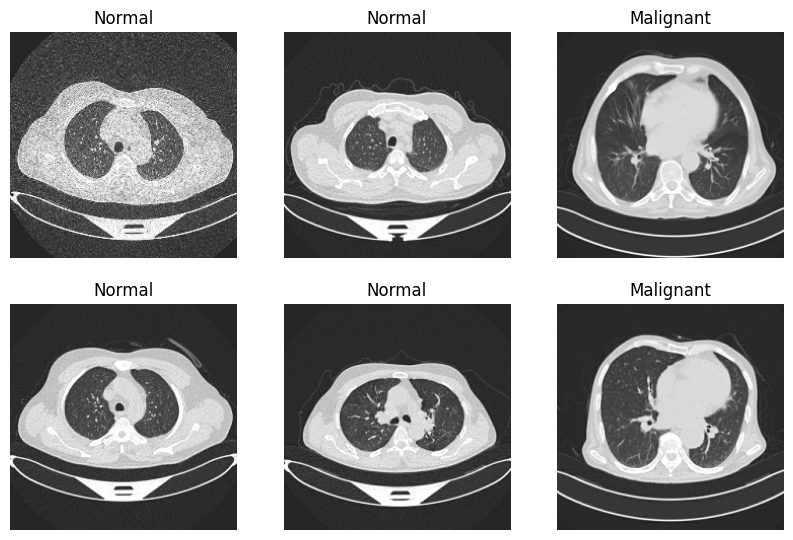

In [12]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_data.class_names[labels[i]])
        plt.axis("off")

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input
from tensorflow.keras.layers import Dense

In [14]:
# model=Sequential()

# model.add(Conv2D(16,(3,3), activation='relu', input_shape=(224,224,3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32,(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32,(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32,(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())
# model.add(Dense(30,activation='relu'))
# model.add(Dense(10,activation='relu'))
# model.add(Dense(100,activation='relu'))
# model.add(Dense(133,activation='relu'))
# model.add(Dense(4,activation='softmax'))

In [15]:
input_shape=(224, 224, 3)
# regularizer = tf.keras.regularizers.l2(0.001)

model=Sequential()
model.add(Input(shape=input_shape))
model.add(Conv2D(128, (5, 5), padding='same', strides=(1, 1), name='conv1', activation='relu'))
model.add(MaxPool2D((9, 9), strides=(3, 3)))

model.add(Conv2D(64, (5, 5), padding='same', strides=(1, 1), name='conv2', activation='relu'))
model.add(MaxPool2D((7, 7), strides=(3, 3)))
    
model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv3', activation='relu'))
model.add(MaxPool2D((5, 5), strides=(2, 2)))

model.add(Conv2D(32 , (3, 3), padding='same', strides=(1, 1), name='conv4', activation='relu'))
model.add(MaxPool2D((3, 3), strides=(2, 2)))   
    
model.add(Flatten())
# model.add(Dropout(0.1))
model.add(Dense(128, activation='relu', name='fc1'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax', name='fc3'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 224, 224, 128)     9728      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 72, 72, 128)       0         
_________________________________________________________________
conv2 (Conv2D)               (None, 72, 72, 64)        204864    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 22, 22, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
conv4 (Conv2D)               (None, 9, 9, 32)          9

In [17]:
# model.compile(optimizer = tf.keras.optimizers.Adam(1e-4), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [18]:
optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(train_data, validation_data=val_data, epochs=30)

Epoch 1/30
28/28 [==============================] - 14s 270ms/step - loss: 6.7375 - accuracy: 0.4567 - val_loss: 1.0642 - val_accuracy: 0.4749
Epoch 2/30
28/28 [==============================] - 5s 171ms/step - loss: 0.9760 - accuracy: 0.5080 - val_loss: 1.0112 - val_accuracy: 0.4840
Epoch 3/30
28/28 [==============================] - 5s 170ms/step - loss: 0.8811 - accuracy: 0.5979 - val_loss: 0.9229 - val_accuracy: 0.5479
Epoch 4/30
28/28 [==============================] - 5s 171ms/step - loss: 0.8712 - accuracy: 0.6287 - val_loss: 0.7888 - val_accuracy: 0.6849
Epoch 5/30
28/28 [==============================] - 5s 170ms/step - loss: 0.8747 - accuracy: 0.6185 - val_loss: 0.8532 - val_accuracy: 0.5982
Epoch 6/30
28/28 [==============================] - 5s 168ms/step - loss: 0.7996 - accuracy: 0.6708 - val_loss: 0.8129 - val_accuracy: 0.6027
Epoch 7/30
28/28 [==============================] - 5s 169ms/step - loss: 0.7119 - accuracy: 0.7073 - val_loss: 0.6800 - val_accuracy: 0.7169
Epoch

In [20]:
model.save("weight_new.h5")

In [21]:
model.evaluate(val_data)

7/7 [==============================] - 1s 53ms/step - loss: 0.1455 - accuracy: 0.9543


[0.14554160833358765, 0.9543378949165344]

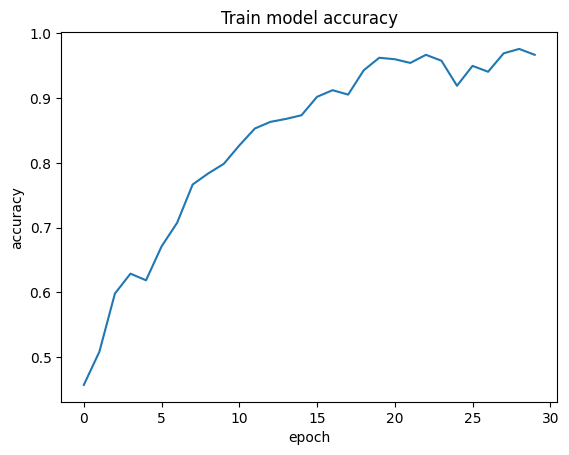

In [22]:
plt.plot(history.history['accuracy'])
plt.title('Train model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

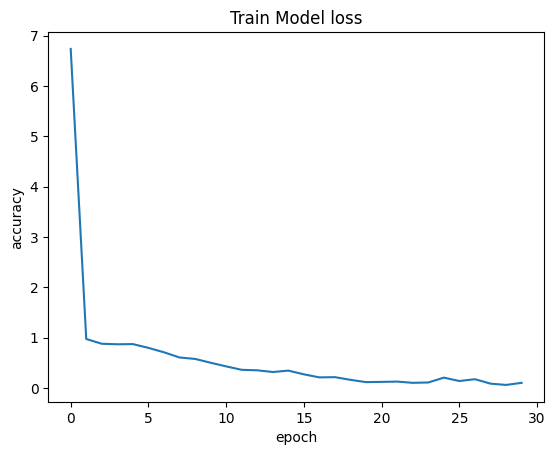

In [23]:
plt.plot(history.history['loss'])
plt.title('Train Model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

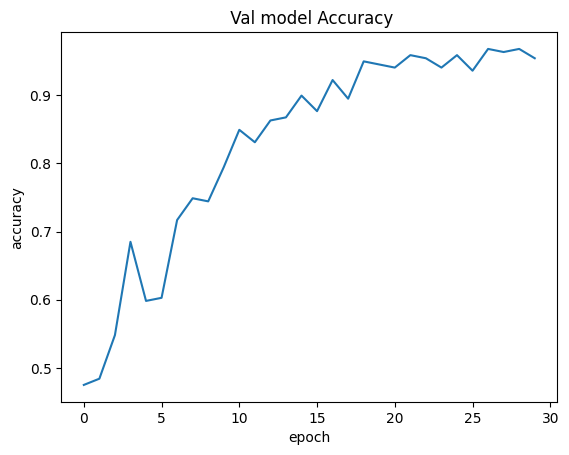

In [24]:
plt.plot(history.history['val_accuracy'])
plt.title(' Val model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

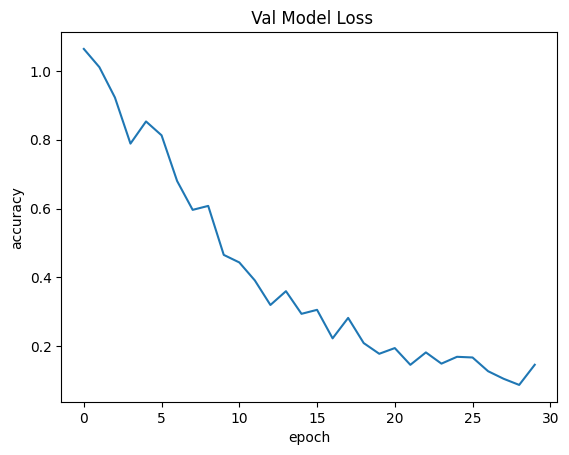

In [25]:
plt.plot(history.history['val_loss'])
plt.title(' Val Model Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

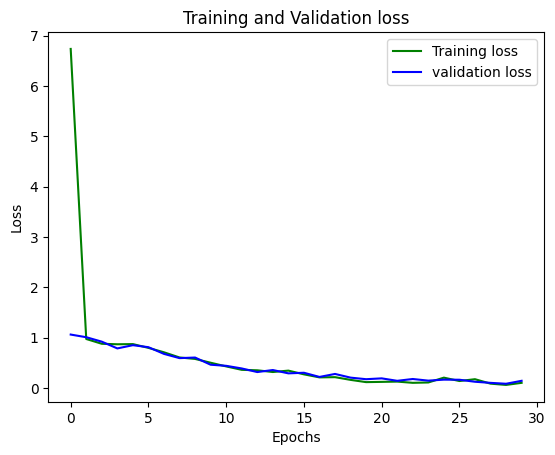

In [26]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

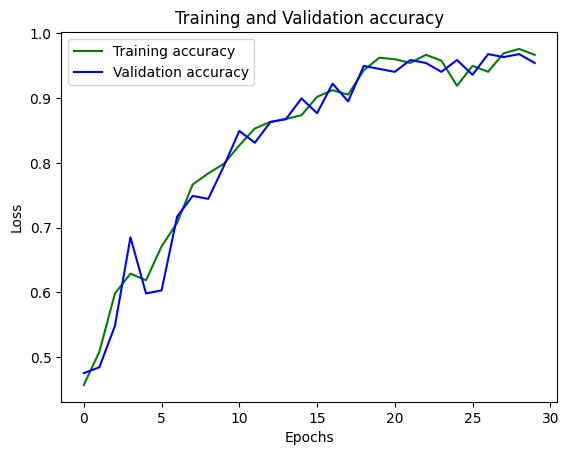

In [27]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
plt.plot(accuracy_train, 'g', label='Training accuracy')
plt.plot(accuracy_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
class_names={0:"Bengin", 1:"Malignant", 2:"Normal"}

In [30]:
for images, labels in val_data.take(1):
    for i in range(6):
        print("True_class:",val_data.class_names[labels[i]])
        x = image.img_to_array(images[i])
        x = np.expand_dims(x, axis=0)
        p=np.argmax(model.predict(x))
        if p==0:
            print("Predicted Image: Bengin")
        elif p==1:
            print("Predicted Image: Malignant")
        else:
            print("Predicted Image: Normal")
        
        print("Predicted class:",p)

True_class: Normal
Predicted Image: Normal
Predicted class: 2
True_class: Malignant
Predicted Image: Malignant
Predicted class: 1
True_class: Normal
Predicted Image: Normal
Predicted class: 2
True_class: Malignant
Predicted Image: Malignant
Predicted class: 1
True_class: Normal
Predicted Image: Normal
Predicted class: 2
True_class: Normal
Predicted Image: Normal
Predicted class: 2
